# Recommendation system for Electronic products on an e-commerce website 

### Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.


##### Steps

1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)
2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.
8. Summarise your insights.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cols=["userId", "productId","ratings","timestamp"]

df=pd.read_csv("ratings_Electronics.csv",names=cols)
df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
df.shape

(7824482, 4)

In [4]:
df.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002233DF46048>,
      dtype=object)

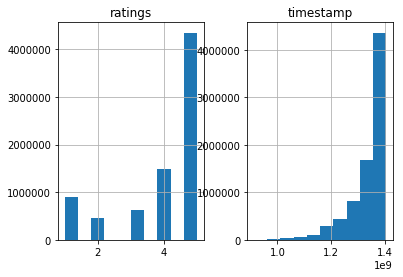

In [5]:
df.hist()

1. rating 5 has the highest occurance and rating 2 has the least occurance.
2. Almost 50% ratings are 5
3. More than 50% of the ratings were received in the timestamp range 1.4 le9


In [6]:
print("total unique users - ",len(df["userId"].unique()))
print("total unique products - ",len(df["productId"].unique()))
print("total unique ratings - ",len(df["ratings"].unique()))
print("total unique timestamp - ",len(df["timestamp"].unique()))

total unique users -  4201696
total unique products -  476002
total unique ratings -  5
total unique timestamp -  5489


In [7]:
print(df["userId"].value_counts().head(5))
print(df["userId"].value_counts().tail(5))

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64
AXU104DSGASPB     1
AAWKE58ER2E0M     1
A31BU8AGW7NIVA    1
A1XXM405ULZE4E    1
AK3GF1VEC90WQ     1
Name: userId, dtype: int64


1. Highest number of ratings given  by an individual user is 520 and the least number of ratings given is 1

In [8]:
print(df["productId"].value_counts().head(5))
print(df["productId"].value_counts().tail(5))

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: productId, dtype: int64
B000MN7Q5W    1
B002ROEJW2    1
B000NE4IVU    1
B00287P32I    1
B00E95XF3Q    1
Name: productId, dtype: int64


1. The product that got the highest rating is B0074BW614    with total 18244 ratings
2. There are many products that just got only 1 rating.

In [9]:
df["ratings"].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

1. Rating 5 has the highest occurance with a number of ratings as 4347541
2. Rating 2 has the least number of occurances i.e,456322

In [10]:
print(df["timestamp"].value_counts().head(5))
print(df["timestamp"].value_counts().tail(5))

1389052800    18276
1388707200    17698
1380672000    17649
1356652800    16108
1388448000    14377
Name: timestamp, dtype: int64
938736000    1
931305600    1
933897600    1
930009600    1
912988800    1
Name: timestamp, dtype: int64


1. Highest no of ratings that were received on a single timestamp (day) is 1389052800 with no of ratings as 18276
2. Least no of ratings that were received on a single timestamp entry is 912988800    with no of ratings as 1

In [11]:
df.groupby('userId')["ratings"].mean().head()

userId
A00000262KYZUE4J55XGL    5.0
A000063614T1OE0BUSKUT    5.0
A00009182QVLSWIGHLS1B    5.0
A00009661LC9LQPGKJ24G    5.0
A00010809P09NUU6ZP6H     5.0
Name: ratings, dtype: float64

1. As the Products that have only one rating are not going to add any value, we can ignore them for modeling.  
2. Also, as suggested, to make the data less sparse/more desnse, let us consider ratings from the users who gave more than 50 ratings
3.

In [12]:
#finding products that were rated more than once. This helps in eliminating the non-popular products (having only 1 rating)
prod_count = df["productId"].value_counts(ascending=False)
pop_product = prod_count.loc[prod_count.values >1].index
len(pop_product)

296264

In [13]:
#finding the popular users, who gave more than 50 ratings
user_count = df["userId"].value_counts(ascending=False)
pop_user = user_count.loc[user_count.values > 50].index
len(pop_user)

1466

There are 1466  users who gave more than 50 ratings and 296264 products that got more than 1 ratings.
Now let us make the data less sparse by removing the ratings/records of the users who gave 

In [14]:
df_popular= df[df.userId.isin(pop_user)]

In [15]:
df_popular.shape

(122171, 4)

In [16]:
# By applying the Popular User filter the number of records were reduced to 1,22,171 from 78,24,482

In [17]:
df_popular= df[df.userId.isin(pop_user) & df.productId.isin(pop_product) ]
df_popular.shape

(119304, 4)

In [18]:
# By applying the Popular Product filter the number of records were further reduced to 119304 from 122171

In [19]:
# As the timestamp is not requried, let us remove this from the dataframe

df_popular=df_popular.drop("timestamp",axis=1)  # this will be our final dataframe for the modeling

In [20]:
df_popular.head(5)


,userId,productId,ratings
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0


In [21]:
df_popular.reset_index(drop=True).head()

,userId,productId,ratings
0,AT09WGFUM934H,0594481813,3.0
1,A32HSNCNPRUMTR,0970407998,1.0
2,A17HMM1M7T9PJ1,0970407998,4.0
3,A3CLWR1UUZT6TG,0972683275,5.0
4,A3TAS1AG6FMBQW,0972683275,5.0


In [22]:
# Top 5 popular products are
#df["productId"].value_counts(ascending=False)
df_popular.sort_values(by=["productId"],ascending=False)

# the output is not correct...

,userId,productId,ratings
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824425,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0
7824424,A1G650TTTHEAL5,B00LGQ6HL8,5.0
7824423,A34BZM6S9L7QI4,B00LGQ6HL8,5.0
7824396,A3NHUQ33CFH3VM,B00LBZ1Z7K,3.0
7824355,A3A4ZAIBQWKOZS,B00LA6T0LS,4.0
7824354,A2NYK9KWFMJV4Y,B00LA6T0LS,4.0


### Collaborative Filtering
#### Transforming data to surprise format & Split data to train and test

In [23]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [24]:
data = Dataset.load_from_df(df_popular[['userId', 'productId', 'ratings']], reader)

In [25]:
data

In [26]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.40,random_state=123)

In [27]:
# user product rating data can be obtained as follows
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [28]:
user_records[0]

[(0, 5.0),
 (6037, 2.0),
 (6119, 3.0),
 (7541, 3.0),
 (9938, 5.0),
 (5777, 5.0),
 (6929, 5.0),
 (12838, 5.0),
 (10409, 5.0),
 (411, 4.0),
 (11993, 5.0),
 (8463, 3.0),
 (16694, 5.0),
 (3678, 5.0),
 (17425, 4.0),
 (11066, 3.0),
 (8067, 4.0),
 (199, 5.0),
 (22180, 2.0),
 (8161, 3.0),
 (19073, 4.0),
 (19861, 5.0),
 (26446, 4.0),
 (7731, 5.0),
 (5853, 4.0),
 (28202, 4.0),
 (8061, 3.0),
 (9262, 5.0)]

In [29]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(1066))

A2PC9ZZIFV31B1
B0013FNZ1M


In [30]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [31]:
algo = KNNWithMeans(k=51,sim_options={'name': 'pearson', 'user_based': False})

In [32]:
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [33]:
len(testset)

47722

In [34]:
testset[:]

[('A1K4G5YJDJQI6Q', 'B000WBR33Y', 4.0),
 ('APQQK1V695AUE', 'B0014T7W8Y', 5.0),
 ('A3R1WFO4KIUQXZ', 'B00166EUI0', 5.0),
 ('A307Y3LMCVEZS1', 'B006LVWFSC', 1.0),
 ('A3SDJ70H00OQCJ', 'B006Q5LJEY', 1.0),
 ('ANRS196NKFVUU', 'B0018M7ZES', 5.0),
 ('A3V0YR50F1XSKP', 'B000HLZXH2', 5.0),
 ('A3V6Z4RCDGRC44', 'B002L6HEAU', 5.0),
 ('A3RMEU4GNP60BM', 'B0050X1OQ6', 5.0),
 ('AZ8XSDMIX04VJ', 'B001XURP7W', 5.0),
 ('A3PJJTAKISAFI9', 'B000I963FE', 1.0),
 ('A3R4794K2RVU1S', 'B001SH2BDI', 5.0),
 ('A20DZX38KRBIT8', 'B00361G10S', 1.0),
 ('A1EXGL6L0QQ0M5', 'B0049S6ZUS', 5.0),
 ('A26KXNN6H1IL0I', 'B001EZYMF4', 4.0),
 ('A3JLOIXFM75QNV', 'B006013O0Q', 3.0),
 ('A3V7D0LH8L7BG0', 'B00AQUO5RI', 5.0),
 ('A2SR7S6ZJJDGNB', 'B006ZTMEZ4', 5.0),
 ('A1ODOGXEYECQQ8', 'B00CELZD8C', 5.0),
 ('A2WYF4POBUXL2O', 'B002WC8862', 4.0),
 ('A186697K4XKXQL', 'B0094S35W4', 5.0),
 ('A1P4XD7IORSEFN', 'B002OOWB3O', 5.0),
 ('AYGEKID3G7DPW', 'B003WOL4VK', 5.0),
 ('A2T24Z5QP2OMXU', 'B00GG835JI', 4.0),
 ('A1X3DA7C61WZLQ', 'B006GWO5WK', 3.0),
 ('A

In [35]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)
accuracy.mae(test_pred)

RMSE: 1.1253
MAE:  0.8011


0.8011381396156292

In [36]:
test_pred[:]

[Prediction(uid='A1K4G5YJDJQI6Q', iid='B000WBR33Y', r_ui=4.0, est=4.262091028470844, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='APQQK1V695AUE', iid='B0014T7W8Y', r_ui=5.0, est=4.8, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3R1WFO4KIUQXZ', iid='B00166EUI0', r_ui=5.0, est=4.545454545454546, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A307Y3LMCVEZS1', iid='B006LVWFSC', r_ui=1.0, est=4.262091028470844, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3SDJ70H00OQCJ', iid='B006Q5LJEY', r_ui=1.0, est=4.262091028470844, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ANRS196NKFVUU', iid='B0018M7ZES', r_ui=5.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3V0YR50F1XSKP', iid='B000HLZXH2', r_ui=5.0, est=4.333333333333333, details={'actual_k': 0, 'was_impossible'

In [37]:
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]
test_pred_df.loc[test_pred_df.was_impossible]

,uid,iid,r_ui,est,details,was_impossible
0,A1K4G5YJDJQI6Q,B000WBR33Y,4.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
3,A307Y3LMCVEZS1,B006LVWFSC,1.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
4,A3SDJ70H00OQCJ,B006Q5LJEY,1.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
12,A20DZX38KRBIT8,B00361G10S,1.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
15,A3JLOIXFM75QNV,B006013O0Q,3.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
23,A2T24Z5QP2OMXU,B00GG835JI,4.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
26,A1KKE6VX8VPWZK,B000BI1XNE,4.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
29,A2PZXXPGLXXKZU,B004YQZKBU,3.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
31,A3D0UM4ZD2CMAW,B005THXZDS,5.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True
34,AGX2K0FMS0IVL,B004IY7F3O,5.0,4.262091,"{'was_impossible': True, 'reason': 'User and/o...",True


In [38]:
testset_new = trainset.build_anti_testset()

In [39]:
len(testset_new)

46878534

In [40]:
testset_new[:]

[('A2PC9ZZIFV31B1', 'B0007WK8KS', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B004GF8TIK', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B005MN4NS0', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B0039BPG1A', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B0009SHDGC', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B004N622H6', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B001TSMJDS', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B000XPS3U6', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B002O1W6ZK', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B001TH7GVE', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B000GA7688', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B0046HAO40', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B0079TOI8K', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B005A0B7CA', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B00005T3G0', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B00C4034IE', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B001B1C7QM', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B0009PV49W', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B006K1S

In [41]:
testset_new = trainset.build_anti_testset()

In [42]:
len(testset_new)

46878534

In [43]:
testset_new[:5]

[('A2PC9ZZIFV31B1', 'B0007WK8KS', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B004GF8TIK', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B005MN4NS0', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B0039BPG1A', 4.262091028470844),
 ('A2PC9ZZIFV31B1', 'B0009SHDGC', 4.262091028470844)]

In [44]:
predictions = algo.test(testset_new[:])

In [45]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [46]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])
predictions_df.columns = ["userId","productId","est_rating"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [47]:
predictions_df

,userId,productId,est_rating
38049649,AZOK5STV85FBJ,B0007WK8KS,5.0
38049653,AZOK5STV85FBJ,B0009SHDGC,5.0
38049654,AZOK5STV85FBJ,B004N622H6,5.0
38049657,AZOK5STV85FBJ,B002O1W6ZK,5.0
38049665,AZOK5STV85FBJ,B001B1C7QM,5.0
38049666,AZOK5STV85FBJ,B0009PV49W,5.0
38049668,AZOK5STV85FBJ,B009YCASK2,5.0
38049677,AZOK5STV85FBJ,B004SY5O5K,5.0
38049682,AZOK5STV85FBJ,B00008W7LK,5.0
38049683,AZOK5STV85FBJ,B008BU4QC4,5.0


In [48]:
top_5_recos = predictions_df.groupby("userId").head(5).reset_index(drop=True)


,userId,productId,est_rating
0,AZOK5STV85FBJ,B0007WK8KS,5.0
1,AZOK5STV85FBJ,B0009SHDGC,5.0
2,AZOK5STV85FBJ,B004N622H6,5.0
3,AZOK5STV85FBJ,B002O1W6ZK,5.0
4,AZOK5STV85FBJ,B001B1C7QM,5.0
5,AZNUHQSHZHSUE,B0007WK8KS,5.0
6,AZNUHQSHZHSUE,B0009SHDGC,5.0
7,AZNUHQSHZHSUE,B004N622H6,5.0
8,AZNUHQSHZHSUE,B002O1W6ZK,5.0
9,AZNUHQSHZHSUE,B001TH7GVE,5.0


In [49]:
top_5_recos

,userId,productId,est_rating
0,AZOK5STV85FBJ,B0007WK8KS,5.0
1,AZOK5STV85FBJ,B0009SHDGC,5.0
2,AZOK5STV85FBJ,B004N622H6,5.0
3,AZOK5STV85FBJ,B002O1W6ZK,5.0
4,AZOK5STV85FBJ,B001B1C7QM,5.0
5,AZNUHQSHZHSUE,B0007WK8KS,5.0
6,AZNUHQSHZHSUE,B0009SHDGC,5.0
7,AZNUHQSHZHSUE,B004N622H6,5.0
8,AZNUHQSHZHSUE,B002O1W6ZK,5.0
9,AZNUHQSHZHSUE,B001TH7GVE,5.0


## SVD Based Recommendation

In [52]:
df_popular.shape

(119304, 3)

In [54]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_popular[['userId', 'productId', 'ratings']], reader)

In [55]:

from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.40,random_state=123)

In [56]:
from surprise import SVD
from surprise import accuracy

In [57]:
svd_model = SVD(n_factors=4,biased=False)
svd_model.fit(trainset)

In [58]:
test_pred = svd_model.test(testset)

In [59]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [60]:
test_pred_df.head()

,0,1,2
0,A1K4G5YJDJQI6Q,B000WBR33Y,4.262091
1,APQQK1V695AUE,B0014T7W8Y,1.000000
2,A3R1WFO4KIUQXZ,B00166EUI0,4.312265
3,A307Y3LMCVEZS1,B006LVWFSC,4.262091
4,A3SDJ70H00OQCJ,B006Q5LJEY,4.262091


In [61]:
test_pred_df.columns = ["userId","productId","est_rating"]
test_pred_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [62]:
test_pred_df.head()

,userId,productId,est_rating
5762,AZOK5STV85FBJ,B000CQQ092,4.262091
17874,AZOK5STV85FBJ,B00005854B,4.262091
23385,AZOK5STV85FBJ,B000E922SA,4.262091
23843,AZOK5STV85FBJ,B006991GC2,4.262091
24374,AZOK5STV85FBJ,B000QSJWO6,4.262091


In [63]:
top_5_recos = test_pred_df.groupby("userId").head(5).reset_index(drop=True)

In [70]:
top_5_recos.head(25)

,userId,productId,est_rating
0,AZOK5STV85FBJ,B000CQQ092,4.262091
1,AZOK5STV85FBJ,B00005854B,4.262091
2,AZOK5STV85FBJ,B000E922SA,4.262091
3,AZOK5STV85FBJ,B006991GC2,4.262091
4,AZOK5STV85FBJ,B000QSJWO6,4.262091
5,AZNUHQSHZHSUE,B000BP8GQO,4.262091
6,AZNUHQSHZHSUE,B0013HH1HY,4.262091
7,AZNUHQSHZHSUE,B000NWHVU2,4.262091
8,AZNUHQSHZHSUE,B001DFZ5J2,4.262091
9,AZNUHQSHZHSUE,B000A6AXHE,4.262091


In [69]:

# compute RMSE
accuracy.rmse(test_pred)
accuracy.mae(test_pred)

RMSE: 2.1408
MAE:  1.6923


1.6922741479898522

#### Insights 2:

####    Amongst the two recommendation models KNNWithMeans and SVD Recommendation model, SVD is pretty quick in generating the results.  KNNWithMeans is more expensive in terms of system resource utilization and also time consuming.  

####    RMSE is higher in case of the SVD model.  With KNNWithMeans RMSE is 1.1253 and with SVD model it is 2.1408.  Which indicates, data fits better with KNNWithMeans and can generate more accurate results.
    
####    Mean Absolute Error (MAE) is also less in KNNWithMeans (0.8011) compared to SVD model (1.6923)